### Data Analysis

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../"))
df = pd.read_csv('data/Poject_data.csv',error_bad_lines=False,index_col=0,encoding= 'unicode_escape')
import warnings

['.git', 'debug.log', 'library.jpg', 'project_files', 'PROPOSAL.md', 'README.md']


###### Feature Description:
* book_id: This is the GoodReads book id
* Title: Title of the book
* Author: The primary author of the book 
* rating: The Average rating of the book
* num_pages: The number of pages in the book
* number_of_ratings: The total number of ratings the book received in GoodReads
* text_reviews_count: The total number of reviews the book received in GoodReads
* Publisher: The publisher of the paperback version of the book
* Description: A short description of what the book is about
* awards: The number of awards the book received
* genre: The genre of the book
* Movie: IF there is a move based on the book
* year: The yearbook was published in 

In [6]:
#Finding the number of rows and columns in the dataset
df.shape 

(17234, 14)

There are a total of 17236 books and each book has 14 features

In [7]:
df.drop(['book_id'],axis = 1,inplace=True)
df.head(2)

,title,author,rating,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie,year_clean
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,fantasy_paranormal_fiction,yes,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,870,2153167,29221,9/1/2004,Scholastic Inc.,There is a door at the end of a silent corrido...,9,fantasy_paranormal_fiction,yes,2004


The book_id is unique id to identify the book , we dont require it so we can drop it .

In [8]:
# Displaying renaming columns
df.rename(columns={'num_pages':'total_pages'},inplace=True) 
df.head(1)

,title,author,rating,total_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie,year_clean
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,fantasy_paranormal_fiction,yes,2006


##### Lets  See which are the top 10 most rated books

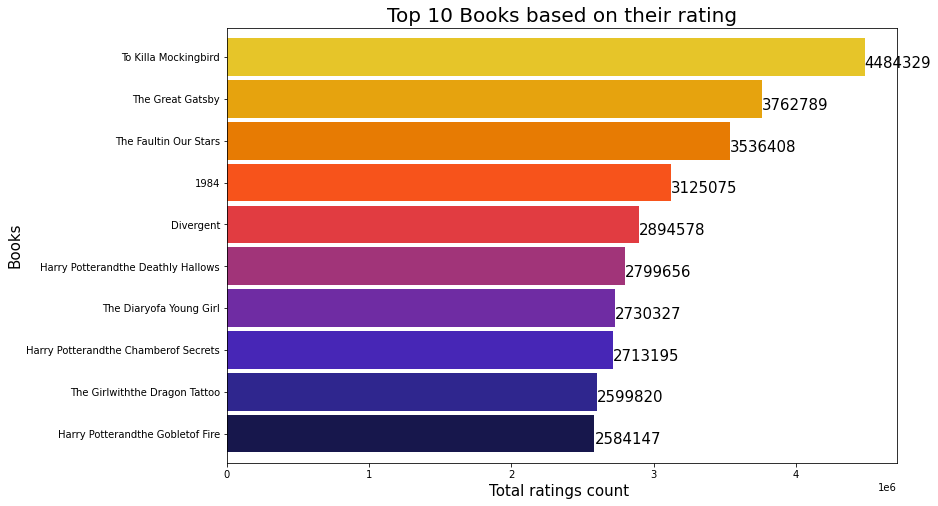

In [5]:
most_rated = df.sort_values('number_of_ratings',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['number_of_ratings'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 Books based on their rating",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

###### observation:
This graph shows the total number of ratings on the X-axis and Titles on the Y-axis. This only includes the total number of ratings regardless of good or bad.
We can see from the ratings "Kill a Mockingbird" that dominates our dataset followed by "The Great Gatsby" and "The Fault in our stars". Let's delve deeper to find if a book can be recommended solely on ratings. 

In [13]:
# Method to convert string into int
def to_int(text):
    return int(text)

In [14]:
# Cleaning data by removing entries without reviews
df=df[df['text_reviews_count']!='Unavailable']
df['text_reviews_count']=df['text_reviews_count'].apply(lambda x :to_int(x) )

##### Now, Lets  see which are the top 10 most reviewed books

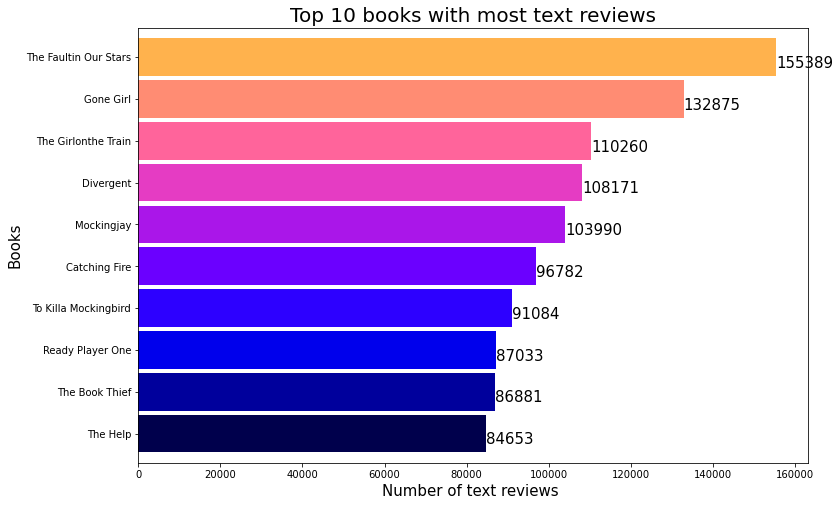

In [15]:
most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2',12))
ax.set_xlabel("Number of text reviews ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with most text reviews",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

###### observation:
This graph shows the top 10 books which have the highest number of text reviews. Y-axis displays book titles and X-axis displays the number of reviews. In our previous observation, "Kill a Mockingbird" dominated the whole dataset but right now we can see Kill a Mockingbird is nowhere to be found if we sort our database solely based on the number of reviews. This means books cannot be recommended solely based on either the number of reviews or the number of ratings. Let's perform more functions.

##### Is there a relation between the number of ratings and the number of text reviews a book recieve ?

In [16]:
most_text_reviews = df.sort_values('text_reviews_count',ascending=False)[:30]

Text(0, 0.5, 'Number of text ratings')

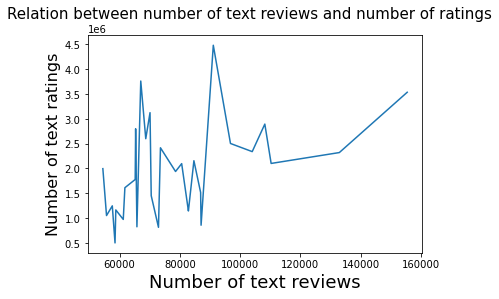

In [48]:
fig = plt.figure()
plt.plot(most_text_reviews['text_reviews_count'],most_text_reviews['number_of_ratings'])
fig.suptitle('Relation between number of text reviews and number of ratings', fontsize=15)
plt.xlabel('Number of text reviews', fontsize=18)
plt.ylabel('Number of text ratings', fontsize=16)

###### observation:
There is a positive relationship between the variables, which is expected as the more people rating the book will mean that more people have read the book and will receive more text reviews

c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


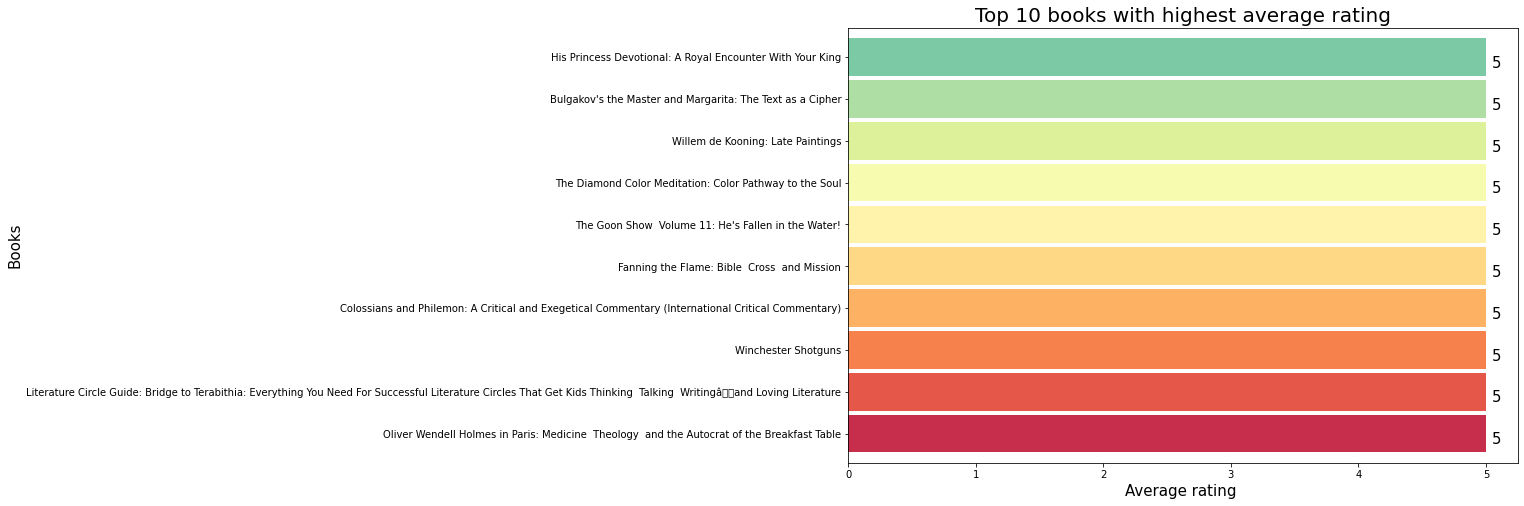

In [22]:
high_average_rating =df[df['rating'] >4]
high_average_rating = high_average_rating.sort_values('rating',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = high_average_rating['rating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Average rating ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with highest average rating",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()


In [31]:
high_average_rating["number_of_ratings"]

title
Oliver Wendell Holmes in Paris: Medicine  Theology  and the Autocrat of the Breakfast Table                                                                              1
Literature Circle Guide: Bridge to Terabithia: Everything You Need For Successful Literature Circles That Get Kids Thinking  Talking  Writingâand Loving Literature    4
Winchester Shotguns                                                                                                                                                      2
Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary)                                                                        1
Fanning the Flame: Bible  Cross  and Mission                                                                                                                             1
The Goon Show  Volume 11: He's Fallen in the Water!                                                                                        

###### observation:
This graph shows the top 10 books with the highest average rating. Book titles are on the Y-axis and rating is on the X-axis. These books are sorted by the highest average rating which is identical to the books sorted by the number of ratings. Does this mean the more a book ratings have the higher the average rating it will be? Can we recommend a book based on rating only? 
It can be seen that we cannot judge how famous mouse a book is by its rating, as we can see even though the book received an average rating of 5.0 only a few people rated the books 

In [33]:
# Cleaning data by removing entries with not author
df=df[df['author']!='Not_given'] 

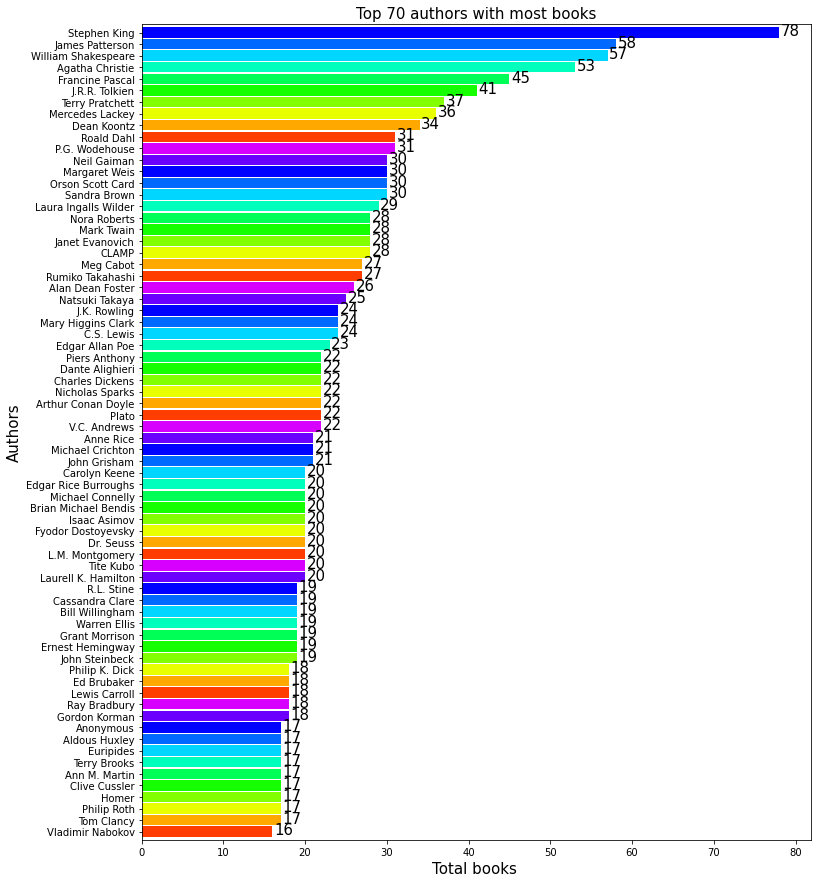

In [34]:
author_of_most_books = df.groupby('author')['title'].count().reset_index().sort_values('title',ascending=False).head(70).set_index('author')
plt.subplots(figsize=(12,15))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 70 authors with most books",fontsize=15,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

##### Observation:
This graph displays authors based on the number of books they have written.
It can be seen that Stephen King has the highest number of books in our dataset with 78 books, followed by James Patterson with 58 books, then William Shakespeare with 57 books. All of them are very well known authors. 

Text(0.5, 0, 'Average rating')

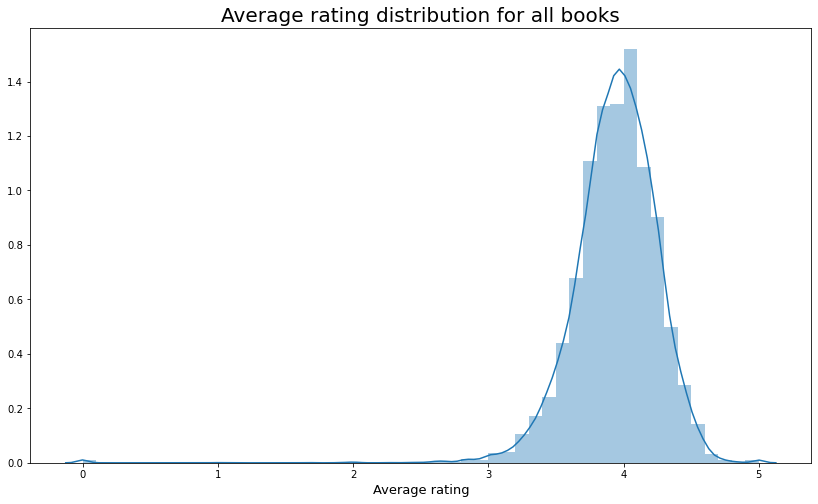

In [12]:
dist = df
dist.rating = dist.rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

From this graph, we can observe that the majority of the books in our dataset are rated between 3.5 to 4.5. Let's take a look at some of the top rated authors first then we will try to find a relation between them.

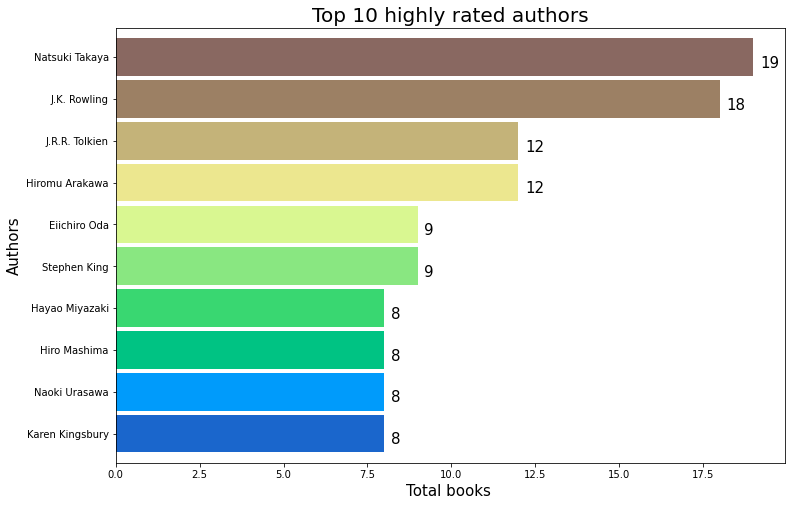

In [13]:
highly_rated_author =df[df['rating']>4.4]
highly_rated_author = highly_rated_author.groupby('author')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('author')
plt.subplots(figsize=(12,8))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('terrain',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

##### Observation:
This bar graph displays authors based on their ratings. We can see from this graph that their books made it to movies. which can also be the reason that these writers were exposed to two different niches i.e. book readers and movie watchers. It is too early to come to conclusions with the current operations done on data. We will now look into the genre to get a bigger picture.

In [35]:
# Dataset had 2 year columns, cleaning dataset by removing one year column
df.drop('year',axis=1,inplace=True)
df.rename(columns={'year_clean':'year'},inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
df.head()

,title,author,rating,total_pages,number_of_ratings,text_reviews_count,publisher,description,awards,genre,Movie,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652,2095690,27591,Scholastic Inc.,The war against Voldemort is not going well; e...,3,fantasy_paranormal_fiction,yes,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,870,2153167,29221,Scholastic Inc.,There is a door at the end of a silent corrido...,9,fantasy_paranormal_fiction,yes,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,Scholastic,The Dursleys were so mean and hideous that sum...,7,fantasy_paranormal_fiction,no,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,435,2339585,36325,Scholastic Inc.,Harry Potter's third year at Hogwarts is full ...,13,fantasy_paranormal_fiction,yes,2004
4,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,152,19,1,Nimble Books,Through the magic of print-on-demand technolog...,0,not_given,no,2005


In [37]:
# Displaying number on books in each genre
df['genre'].value_counts()

fantasy_paranormal_fiction    3393
Other                         2109
history_biography             2040
comics                        1462
mystery_thriller_crime        1413
children                      1211
young_adult                   1091
poetry_philosophy              994
romance                        749
Classics                       598
not_given                      286
Name: genre, dtype: int64

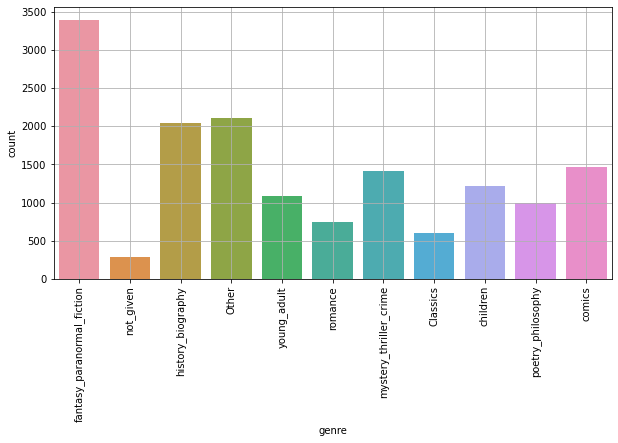

In [38]:
plt.figure(figsize=(10,5))
chart =sns.countplot(df['genre'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.grid()

##### Observation:
Fantasy, Paranormal, and fiction dominate our dataset with around 3400 titles in it. We can conclude from our previous findings that most of the top-rated authors and titles belong to this genre. Books from these genres also made it to the top 10 list of most text reviews and ratings. This narrow down our search and we were ready to go further with our search.

#### Lets check how an authors book rating changes with time 

Text(0.5, 0.98, 'Book ratings of Stephen King ')

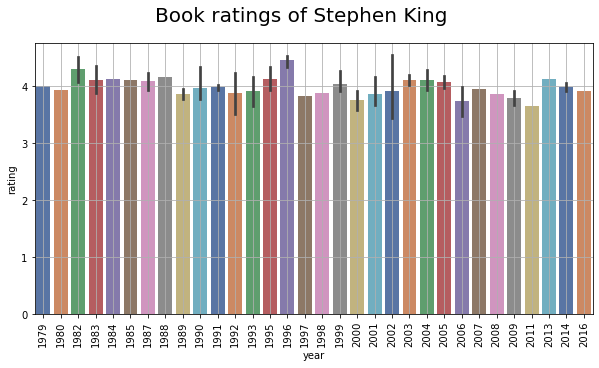

In [50]:
#  Stephen King
sk_df = df[df['author']=='Stephen King']
plt.figure(figsize=(10,5))
chart =sns.barplot( sk_df['year'], sk_df['rating'], palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.grid()
plt.suptitle('Book ratings of Stephen King ', fontsize=20)


Text(0.5, 0.98, 'Book ratings of Agatha Christie ')

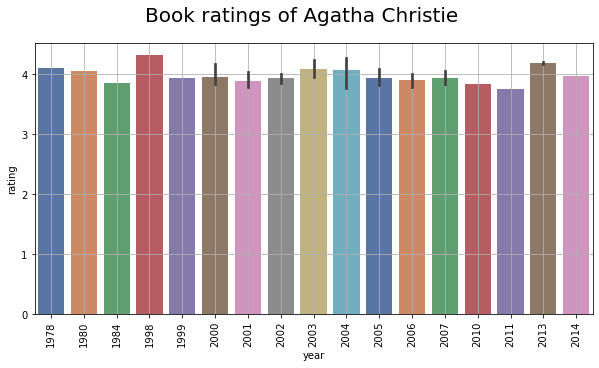

In [51]:
#  Agatha Christie
ac_df = df[df['author']=='Agatha Christie']
plt.figure(figsize=(10,5))
chart =sns.barplot( ac_df['year'], ac_df['rating'], palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.grid()
plt.suptitle('Book ratings of Agatha Christie ', fontsize=20)

Text(0.5, 0.98, 'Book ratings of J.K. Rowling ')

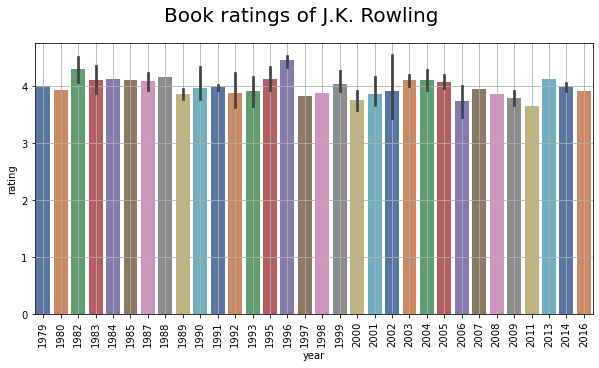

In [52]:
#  J.K. Rowling
jk_df = df[df['author']=='J.K. Rowling']
plt.figure(figsize=(10,5))
chart =sns.barplot( sk_df['year'], sk_df['rating'], palette='deep')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.grid()
plt.suptitle('Book ratings of J.K. Rowling ', fontsize=20)

##### Observation:
Stephen king when compared with Agatha Christie and J.K Rowling, wrote the highest number of books i.e. 78. So we wanted to check the overall rating of this author over the years. Our data indicates that we hit a jackpot as his rating lowest rating was 3.8 throughout 37 years. Which is not too shabby. 

### Now lets look at some statistics of specific authors

Text(0.5, 0.98, 'Genre count of Agatha Christie')

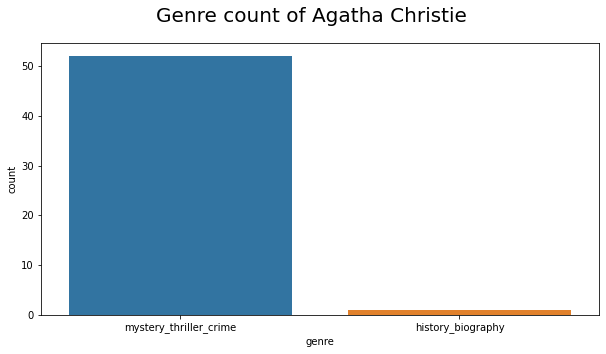

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(ac_df['genre'])
plt.suptitle('Genre count of Agatha Christie', fontsize=20)

Text(0.5, 0.98, 'Genre count of Stephen King')

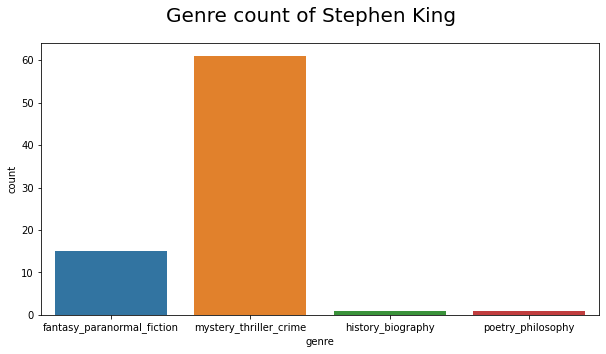

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(sk_df['genre'])
plt.suptitle('Genre count of Stephen King', fontsize=20)

<AxesSubplot:xlabel='genre', ylabel='count'>

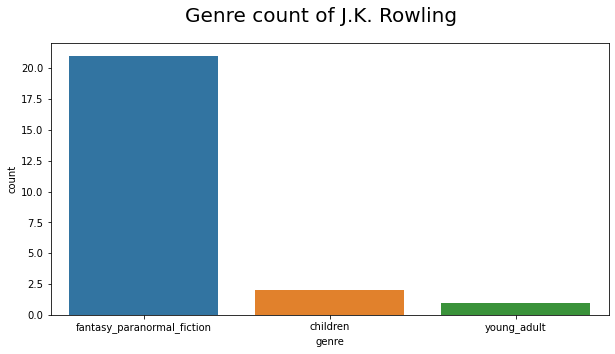

In [57]:
plt.figure(figsize=(10,5))
plt.suptitle('Genre count of J.K. Rowling', fontsize=20)
sns.countplot(jk_df['genre'])

We wanted to see if an author is biased towards a single genre. It can be seen from above graphs that there is a clear relationship between authors and genre.

In [58]:
awards=df[(df['awards']!='Not_given') & (df['awards']!='0.0')]

In [59]:
awards['awards']=awards['awards'].apply(lambda x :float(x) )

<ipython-input-59-361d71de6d3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards['awards']=awards['awards'].apply(lambda x :float(x) )


Text(0.5, 0.98, 'Award counts of author')

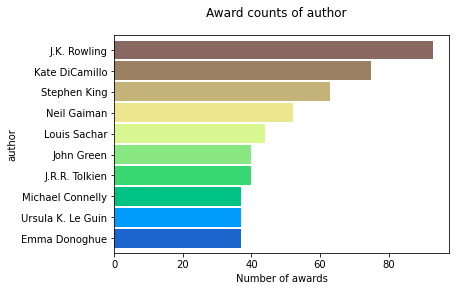

In [63]:
awards.groupby('author').sum()['awards'].sort_values()[-10:].plot.barh(width=0.9,color=sns.color_palette('terrain',12))
plt.xlabel('Number of awards', fontsize=10)
plt.suptitle('Award counts of author', fontsize=12)
# plt.ylabel('Number of text ratings', fontsize=16)

##### Observation:
When we compared the authors on how many rewards they have received, we were not surprised to see that our previous findings were not so different. J.K Roling had the highest number of awards with 93 awards. Not surprising as she wrote one of the most successful book series ever  "Harry Potter".

<AxesSubplot:xlabel='publisher'>

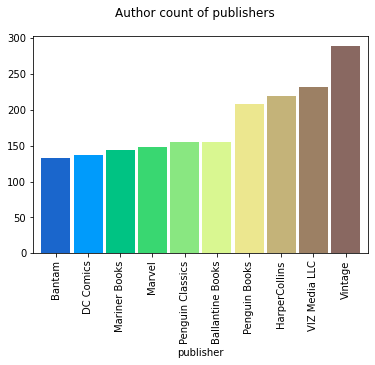

In [67]:
plt.suptitle('Author count of publishers', fontsize=12)
df.groupby('publisher').count()['author'].sort_values()[-10:].plot.bar(width=0.9,color=sns.color_palette('terrain',12))

##### Observations:
The graph illustates how many authors have published there books under each publisher , and we can see that Vintage has the most author under its name 

### Now lets look at some statistics of specific publishers

<AxesSubplot:>

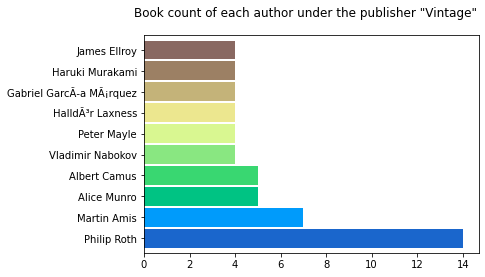

In [71]:
plt.suptitle('Book count of each author under the publisher "Vintage"', fontsize=12)
Vintage_df= df[df['publisher']=='Vintage']
Vintage_df['author'].value_counts()[:10].plot.barh(width=0.9,color=sns.color_palette('terrain',12))

<AxesSubplot:>

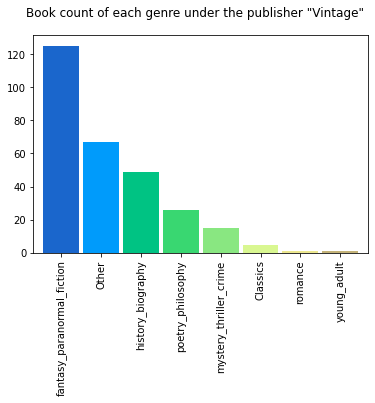

In [72]:
plt.suptitle('Book count of each genre under the publisher "Vintage"', fontsize=12)
Vintage_df['genre'].value_counts()[:10].plot.bar(width=0.9,color=sns.color_palette('terrain',12))

<AxesSubplot:>

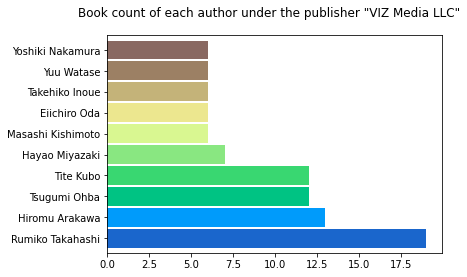

In [73]:
plt.suptitle('Book count of each author under the publisher "VIZ Media LLC"', fontsize=12)
viz_df= df[df['publisher']=='VIZ Media LLC']
viz_df['author'].value_counts()[:10].plot.barh(width=0.9,color=sns.color_palette('terrain',12))

<AxesSubplot:>

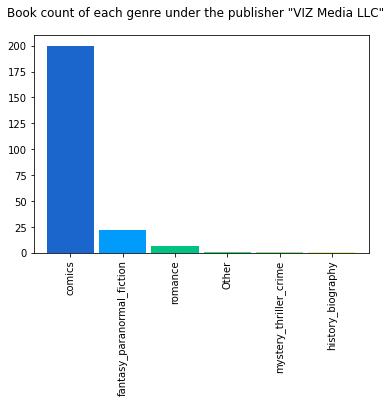

In [74]:
plt.suptitle('Book count of each genre under the publisher "VIZ Media LLC"', fontsize=12)
viz_df['genre'].value_counts()[:10].plot.bar(width=0.9,color=sns.color_palette('terrain',12))

<AxesSubplot:>

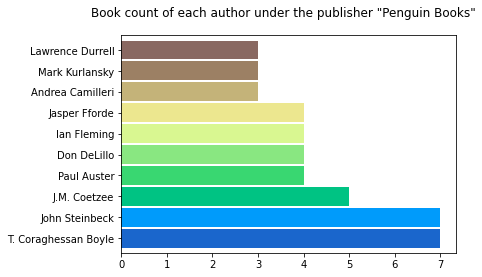

In [75]:
plt.suptitle('Book count of each author under the publisher "Penguin Books"', fontsize=12)
penguin_df= df[df['publisher']=='Penguin Books']
penguin_df['author'].value_counts()[:10].plot.barh(width=0.9,color=sns.color_palette('terrain',12))

<AxesSubplot:>

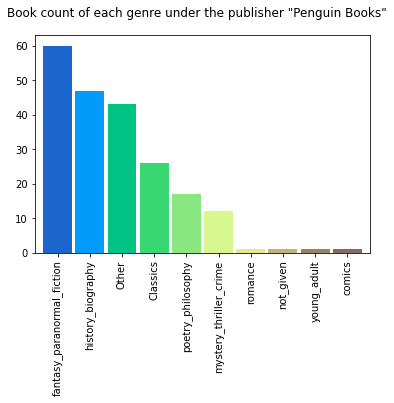

In [76]:
plt.suptitle('Book count of each genre under the publisher "Penguin Books"', fontsize=12)
penguin_df['genre'].value_counts()[:10].plot.bar(width=0.9,color=sns.color_palette('terrain',12))

##### Observations:
We still wanted to include all the possible options we analyzed our data surrounding publishers as well. We wanted to check if a single publisher is biased towards a genre. For example, Viz Media is a publisher that is well known in the Japanese comics industry, it usually publishes Japanese Manga.
Even from the graph, we can see that most of the books published by Viz media are comics. Later we look into what authors work with Viz Media and we see that most of the authors are Japanese, which makes sense. 